In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set(rc={"figure.figsize": [5,5]}, font_scale = 1)

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Classification data >> supervised learning

# preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### No null data

In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## We see that each User Id is unique so, it\`s not important to algorithms

***Delete unncessary columns***

In [7]:
df.drop(["User ID"], inplace = True, axis =1)

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


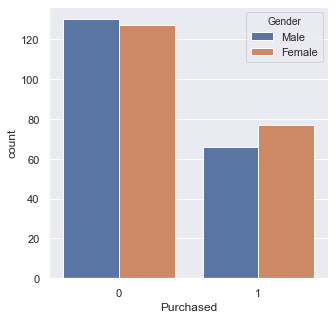

In [9]:
sns.countplot(df["Purchased"], hue = df["Gender"])

## Some of the Females purchased than Males

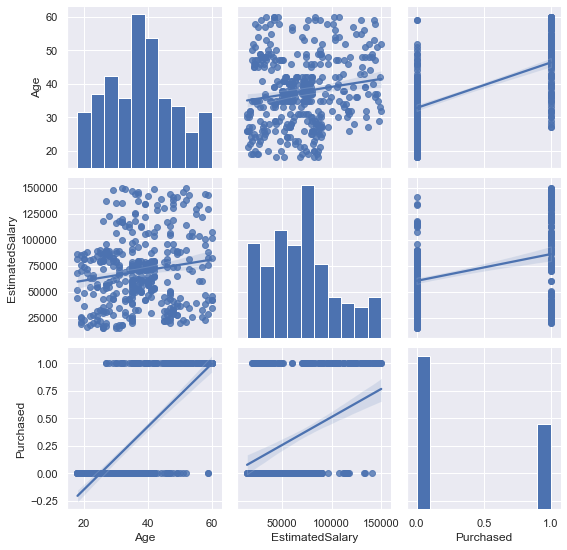

In [10]:
sns.pairplot(df, kind = 'reg')

## Convert male and female into numeric values

In [11]:
gender = pd.get_dummies(df["Gender"])
newframe = pd.concat([df, gender], axis = 1)

In [12]:
newframe.head()

,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,Male,19,19000,0,0,1
1,Male,35,20000,0,0,1
2,Female,26,43000,0,1,0
3,Female,27,57000,0,1,0
4,Male,19,76000,0,0,1


***Delete Gender columns***

In [13]:
newframe.drop("Gender", inplace = True, axis = 1)

In [14]:
newframe.head()

,Age,EstimatedSalary,Purchased,Female,Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


## Split Data

In [15]:
X = newframe.drop("Purchased", axis = 1)
y = newframe["Purchased"]

In [16]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.1)

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(360, 4)
(40, 4)
(360,)
(40,)


## Logistic Regression model

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
LR = LogisticRegression(solver= 'liblinear',max_iter =100 )
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print("model train scores: ", LR.score(x_train, y_train))
print("model test scores: ", LR.score(x_test, y_test))

model train scores:  0.825
model test scores:  0.95


## import metrics

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

Confusion matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)
Accuracy score 0.95
F1_score 0.875
Recall 0.875


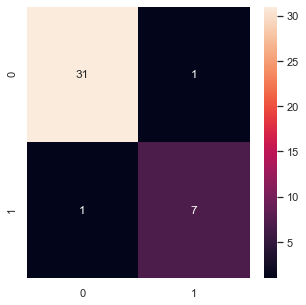

In [63]:
print("Confusion matrix \n", sns.heatmap(confusion_matrix(y_test, y_pred),annot = True))
print("Accuracy score", accuracy_score(y_test, y_pred))
print("F1_score", f1_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))

In [65]:
import joblib

joblib.dump(LR, "LogisticRegression.h5")

['LogisticRegression.h5']